# BCIS 5110 - Group 1
Nader Elkhatib - ID 11481825

Olusoladegbin King - ID 11725681

Lucas Silva - ID 11065496

Akosua Sarpong - ID 11586413

# Key Notes

In [1]:
# Main Dataset:
# https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/
# Shopping activity that entails various types of wearable cloths, purchase amounts, ways of payments, and much more features
# Data types are a mix of categorical, numerical, and binary

# Supplemental Dataset Source (US regions):
# https://www.kaggle.com/datasets/omer2040/usa-states-to-region/
# US states abbreviate codes and regions
# Beneficial for certain analysis and functionality such as aggregation and searching via state code

In [2]:
# Instructions & Guide
# Save csv files in the same location of the script, otherwise adjust the paths under the Read File section
# Question 6: User must input the state code for each state seeking info about, otherwise input "E" to terminate

# Modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

In [4]:
# Main Dataset
data = pd.read_csv('shopping_trends.csv')

In [5]:
# Use to label states in the dataset to their regions
US_regions = pd.read_csv('states.csv')

# Data Exploration & Enriching

In [6]:
# Dataset Shape
print(f'Rows = {data.shape[0]}')
print(f'Columns = {data.shape[1]}')

Rows = 3900
Columns = 19


In [7]:
# Missing Values in the supplemental dataset
# dataset is used to label states in the main dataset with their respective regions
US_regions.isnull().sum()

State         0
State Code    0
Region        0
Division      0
dtype: int64

In [8]:
# Change name to enable merge
US_regions = US_regions.rename(columns={'State': 'Location'})

In [9]:
# Merge to obtain US states attributes such as region and state abbreviation
data = data.merge(US_regions, how='left', on='Location')

In [10]:
# Check for missing values per column
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
State Code                  0
Region                      0
Division                    0
dtype: int64

## Apply missing values per project instructions

In [11]:
np.random.seed(0)
# masking
data[np.random.random(size=data.shape) > 0.9] = np.nan

In [12]:
# Verification randomly applied missing values
# Non-Null Count not the same across the board
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3519 non-null   float64
 1   Age                       3512 non-null   float64
 2   Gender                    3531 non-null   object 
 3   Item Purchased            3505 non-null   object 
 4   Category                  3502 non-null   object 
 5   Purchase Amount (USD)     3487 non-null   float64
 6   Location                  3508 non-null   object 
 7   Size                      3532 non-null   object 
 8   Color                     3509 non-null   object 
 9   Season                    3523 non-null   object 
 10  Review Rating             3515 non-null   float64
 11  Subscription Status       3507 non-null   object 
 12  Payment Method            3518 non-null   object 
 13  Shipping Type             3548 non-null   object 
 14  Discount

In [13]:
# total missing values per feature
data.isnull().sum()

Customer ID                 381
Age                         388
Gender                      369
Item Purchased              395
Category                    398
Purchase Amount (USD)       413
Location                    392
Size                        368
Color                       391
Season                      377
Review Rating               385
Subscription Status         393
Payment Method              382
Shipping Type               352
Discount Applied            422
Promo Code Used             393
Previous Purchases          407
Preferred Payment Method    416
Frequency of Purchases      379
State Code                  409
Region                      359
Division                    371
dtype: int64

# Address Missing Values

In [14]:
# Fill in with the prior value
data = data.fillna(method='ffill')

In [15]:
# Total missing values per feature
# Possible there are remaining missing values because the 1st instance doesn't have a prior value to extract 
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       1
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               1
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
State Code                  0
Region                      1
Division                    0
dtype: int64

In [16]:
# Fill in with the proceeding (next) value
# Serves as assurance no missing values are left post applying forward fill (ffill)
data = data.fillna(method='bfill')

In [17]:
# Verification no missing values
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
State Code                  0
Region                      0
Division                    0
dtype: int64

# Question 1
For each shipping group, which generation is it most used by?

# Q1 Analysis
The script utilizes pandas to categorize a dataset by age into four generations: Boomers, Generation X, Millennials, and Generation Z. Filtering by age range is leveraged to identify the instances belonging to each generation.
Grouping by payment method and the counting of instances was applied, and then a final dataframe presenting the count of instances for each payment method & generation pair is presented. This analysis provides insights into the distribution of shipping preferences among different age groups.

An interesting observation is Millennials own the most count of instances across most of the payment methods

In [18]:
# Retain key features
age_payment  = data[['Age', 'Payment Method']]

In [19]:
#Sort Generation Boomers data
boomers_data =age_payment[(age_payment['Age'] >= 59) & (age_payment ['Age'] <=77)]
boomers_count = boomers_data.groupby (['Payment Method']).count()

In [20]:
#sort Generation X
genx_data =age_payment[(age_payment['Age'] >= 43) & (age_payment ['Age'] <=57)]
genx_count = genx_data.groupby (['Payment Method']).count()

In [21]:
#sort Millenials
millennials_data =age_payment[(age_payment['Age'] >= 26) & (age_payment ['Age'] <=41)]
millennials_count = millennials_data.groupby (['Payment Method']).count()

In [22]:
#sort Generation Z
genz_data =age_payment[(age_payment['Age'] >= 11) & (age_payment ['Age'] <=26)]
genz_count = genz_data.groupby (['Payment Method']).count()

In [23]:
# Results - Combine all into one dataframe
result_payment = pd.concat([boomers_count, genx_count, millennials_count, genz_count], axis=1)
result_payment.columns = ['Boomers', 'Generation X', 'Millennials', 'Generation Z']
result_payment

,Boomers,Generation X,Millennials,Generation Z
Payment Method,,,,
Bank Transfer,134,176,187,102
Cash,143,179,193,108
Credit Card,164,212,219,99
Debit Card,128,198,198,110
PayPal,134,177,180,126
Venmo,156,168,208,99


In [24]:
# Max value per each index (row)
result_payment.max(axis=1)

Payment Method
Bank Transfer    187
Cash             193
Credit Card      219
Debit Card       198
PayPal           180
Venmo            208
dtype: int64

In [25]:
# Output the index associated with the max value for each column
# example: Bank 
result_payment.idxmax(axis=1)

Payment Method
Bank Transfer     Millennials
Cash              Millennials
Credit Card       Millennials
Debit Card       Generation X
PayPal            Millennials
Venmo             Millennials
dtype: object

# Question 2
For each category, what is the preferred payment method and most common color?

# Q2 Analysis
This code provides a concise summary of the most prevalent payment method and color within each category. It's useful for gaining insights into consumer preferences within different product categories.

We are able to see the results of both the most common payment methods and colors for each category of items purchased. Our main categories are clothing, outerwear, footwear and accessories. Credit card seems to be a popular payment method across the board and it is interesting to see the different colors that buyers choose.

In [26]:
#Fulfilling one of the requirements for  Pandas Functions(GroupBy)- For question 2: For each category, what is the preferred payment method and most common color

# Group by 'Category' and find the preferred payment method and most common color for each category
result = data.groupby('Category').agg({
    'Payment Method': lambda x: x.mode().iloc[0],  # Most common payment method
    'Color': lambda x: x.mode().iloc[0]  # Most common color
}).reset_index()

print(result)


      Category Payment Method   Color
0  Accessories    Credit Card   Olive
1     Clothing    Credit Card  Orange
2     Footwear         PayPal    Pink
3    Outerwear           Cash   Olive


# Question 3
What is the distribution of review rating for people over 40 and under 40?

# Q3 Analysis
The code begins by filtering the dataset into two subsets: 'over_40' for people over 40 years old and 'under_40' for people 40 years old or younger. This allows for a specific focus on these age groups. The code results in a visual representation(histogram) of review ratings(ranging from 2.5 to 5). The histograms show us that 4.0 is the most common rating in both groups. 

Overall, this code facilitates a visual exploration of the distribution of review ratings, allowing for an age-based comparison that can inform business decisions and strategies.

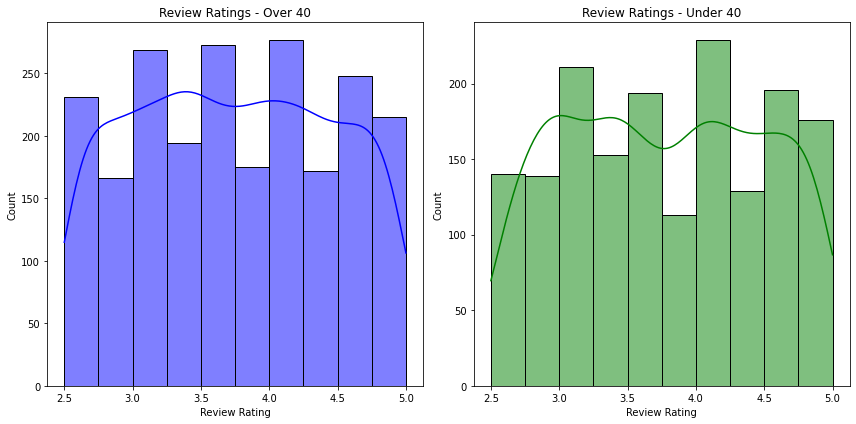

In [27]:
#Fulfilling Data Visualization: For question 3: What is the distribution of review rating for people over 40 and under 40

# Using'Age' and 'Review Rating' columns 
# Filter data for people over 40 and under 40
over_40 = data[data['Age'] > 40]
under_40 = data[data['Age'] <= 40]

#Use histograms to plot for review ratings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(over_40['Review Rating'], bins=10, kde=True, color='blue')
plt.title('Review Ratings - Over 40')

plt.subplot(1, 2, 2)
sns.histplot(under_40['Review Rating'], bins=10, kde=True, color='green')
plt.title('Review Ratings - Under 40')

plt.tight_layout()
plt.show()

# Question 4
For each season, what is the average purchase amount and the most common size among customers with a subscription?

# Q4 Analysis
This code begins with a conditional statement that answers the question: Does the customer have a subscription? This code allows you to analyze the purchasing behavior of customers with a subscription during different seasons. You can identify trends, preferences, and variations in average purchase amount and size across seasons.

The results show the average purchase amount in USD and the most common customer-chosen sizes for items in each season. It is interesting to see that Medium is the most common size purchased all year round. 

In [28]:
# Fulfilling Conditional statement requirement - For Question 4: For each season, what is the average purchase amount and the most common size among customers with a subscription

# Filter customers with a subscription - conditional statement to filter for only those with a subscritption 
subscribed_customers = data[data['Subscription Status'] == 'Yes']

# Group by 'Season' and calculate average purchase amount and most common size
result = subscribed_customers.groupby('Season').agg({
  'Purchase Amount (USD)': 'mean',  # Average purchase amount
    'Size': lambda x: x.mode().iloc[0]  # Most common size
}).reset_index()
print(result)

   Season  Purchase Amount (USD) Size
0    Fall              61.724265    M
1  Spring              59.136531    M
2  Summer              56.707407    M
3  Winter              60.837500    M


# Question 5
What are the top 5 items purchased with a discount and without a discount?

# Q5 Analysis
Jewelry is the top item purchased with a discount. Speculation is jewelry purchase price is one of the highest (if not the highest) since the material to produce jewelry is usually higher in cost than other items' materials, therefore jewelry becomes more attractive to customers when a discount is applied.

Blouse and Socks tied for the top item purchased without a discount, these are essentials for everyday life therefore customers will not purchase immediately and speculation is their purchase prices are low naturally

In [29]:
def discount_top (discount):
    '''
    Input: 'Yes' or 'No', 'Yes' means a discount is applied, 'No' is no discount applied
    Output: Top 5 items purchased either with a discount or without a discount
    Description: 
    Count of instances of items whether a discount is applied or not
    Only output the top 5 items
    If input is other than 'Yes' or 'No', function will terminate and output an error message
    Example:
    When the input is 'Yes', then a dataframe of the 5 items with highest instance count will output
    '''
    # filter for discount applied Yes or No, based on input
    data_discount = data.loc[data['Discount Applied'] == discount]
    
   # Groupby item & count
    data_discount_item_count = data_discount.groupby(['Item Purchased'])
    data_discount_item_count= data_discount_item_count.count()
    data_discount_item_count = data_discount_item_count[['Customer ID']]
    
    # Revert index back to features to ease readability
    data_discount_item_count = data_discount_item_count.reset_index()
    
    # Descending sorting
    data_discount_item_count = data_discount_item_count.sort_values(['Customer ID'], ascending=False)
    
    # Rename for clarity
    data_discount_item_count = data_discount_item_count.rename(columns={'Customer ID': 'Instance Count'})
    
    # For the statement output
    # exit function will output an error message and terminate the function
    if discount == 'Yes':
        discount_applicable = 'with'
    elif discount == 'No':
        discount_applicable = 'without'
    else:
        sys.exit('Must input Yes or No')
    
    print(f'Top 5 items purchased {discount_applicable} discount are:')
    return data_discount_item_count.head()

In [30]:
# Top 5 items with a discount
discount_top ('Yes')

Top 5 items purchased with discount are:


,Item Purchased,Instance Count
12,Jewelry,82
8,Hat,78
13,Pants,78
4,Coat,77
5,Dress,75


In [31]:
# Top 5 items without a discount
discount_top ('No')

Top 5 items purchased without discount are:


,Item Purchased,Instance Count
2,Blouse,110
21,Socks,110
10,Jacket,103
16,Shirt,99
12,Jewelry,97


# Question 6
What is the most item purchased and its average purchase amount for selected states?

Also, what is the count of instances (items purchased) per region?

# Q6 Analysis
Most item purchased per selected states:
* States selected for the following analysis are IL, FL, TX, OR, & NY (user can input any state)
* Most occurring Item Purchased for FL is coat, this is unexpected because of its non-cold climate all year long. In addition, the coat's average Purchase Amount is lower than NY's top item's average Purchase Amount, which is a shirt. A shirt's purchase amount should be lower because it costs signficantly less to manufacture than a coat.
* IL most purchased item is a shirt even though it is known to have cold / cool climate for majority of the year, blouse or coat would make more sense.

------------------------------------------------------------------
Count of instance per region:
* South entails most purchased items (instance count) and the Northeast with the lowest, this can indicate growing (South) vs matured (Northeast) markets.


### Most item purchased and its average purchase amount (revenue) per selected states

In [32]:
# Methodology
# (1) Count of instances per State and Item Purchased
# (2) Aggregate Purchase Amount (revenue) per State and Item Purchased
# (3) Merge (1) and (2)
# (4) Calculate Average Revenue (Purchase Amount) per State and Item Purchased
# (5) For every selected state, output:
## A. Most purchased item
## B. Average revenue of the state's most purchased item

In [33]:
# Instance count per State and Item Purchased
data_item_count = data.groupby(['State Code', 'Item Purchased'])
data_item_count = data_item_count.count()
data_item_count = data_item_count[['Customer ID']]

In [34]:
# Aggregate Purchase Amount (Revenue) per State and Item Purchased
data_ST_item_revenue = data.groupby(['State Code', 'Item Purchased'])
data_ST_item_revenue = data_ST_item_revenue.sum()
data_ST_item_revenue = data_ST_item_revenue[['Purchase Amount (USD)']]

In [35]:
# Merge Instance Count and Aggregate Purchase Amount grouped dataframes
data_ST_item = data_item_count.merge(data_ST_item_revenue, how='outer', left_index=True, right_index=True)

In [36]:
# Average Revenue (Purchase Amount) per State & Item
data_ST_item['Average Purchase Amt'] = data_ST_item['Purchase Amount (USD)'] / data_ST_item['Customer ID'] 

In [37]:
# Revert index back to features to ease readability
data_ST_item = data_ST_item.reset_index()

In [38]:
# Rename features to clarify what they contain
data_ST_item = data_ST_item.rename(columns = {'Customer ID': 'Instance Count'})

In [39]:
# Function to output selected state's metrics - most item purchased and associated average revenue
# Must enter as two letters in capital form
# Enter E to exit

state = input('Input state abbreviation as 2 capitalized letters, otherwise input E to exit: ')

while state != 'E':

    if state not in np.array(data_ST_item['State Code']):
        print('State not found')
        print()
        state = input('Input state abbreviation as 2 capitalized letters, otherwise input E to exit: ')

    else:
        while state in np.array(data_ST_item['State Code']):
            data_ST = data_ST_item.loc[data_ST_item['State Code'] == state]
            data_ST = data_ST.sort_values(['Instance Count'], ascending=False)
            data_ST_max = data_ST.head(1)
            print(f'State: {data_ST_max.iloc[0,0]} | Item: {data_ST_max.iloc[0,1]} | Instance Count: {data_ST_max.iloc[0,2]} | Average Purchase Amount of Item: {data_ST_max.iloc[0,4]}')
            print()
            state = input('Input state abbreviation as 2 capitalized letters, otherwise input E to exit: ')
        
        while state == 'E':
            break

Input state abbreviation as 2 capitalized letters, otherwise input E to exit: IL
State: IL | Item: Shirt | Instance Count: 10 | Average Purchase Amount of Item: 60.0

Input state abbreviation as 2 capitalized letters, otherwise input E to exit: FL
State: FL | Item: Coat | Instance Count: 6 | Average Purchase Amount of Item: 56.5

Input state abbreviation as 2 capitalized letters, otherwise input E to exit: TX
State: TX | Item: Shoes | Instance Count: 7 | Average Purchase Amount of Item: 56.42857142857143

Input state abbreviation as 2 capitalized letters, otherwise input E to exit: OR
State: OR | Item: Blouse | Instance Count: 6 | Average Purchase Amount of Item: 58.833333333333336

Input state abbreviation as 2 capitalized letters, otherwise input E to exit: NY
State: NY | Item: Shirt | Instance Count: 6 | Average Purchase Amount of Item: 59.833333333333336

Input state abbreviation as 2 capitalized letters, otherwise input E to exit: E


### Region level
Count of instance is the equivalent to the count of items purchased

In [40]:
# Methodology
# Create numpy array of data's feature Region
# Create 2D nump array of (1) Unique regions (2) Count of instances of each region
# Visualize

In [41]:
# Wrap the Region feature from the data df into a numpy array
data_region_array = np.array(data['Region'])

In [42]:
# Count of occurrences of each element
# Count will be incorporated in a new dimension
# 1st dimension will only display the unique regions

data_region_array = np.unique(data_region_array, return_counts=True)

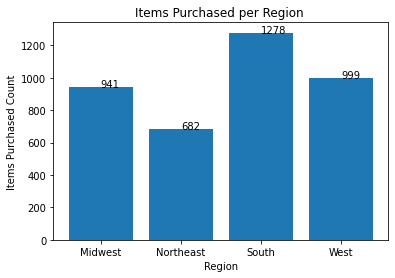

Region: Midwest | Items Purchase Count = 941
Region: Northeast | Items Purchase Count = 682
Region: South | Items Purchase Count = 1278
Region: West | Items Purchase Count = 999


In [43]:
# Visual of each region's instance count (aka items purchased)
plt.bar(data_region_array[0], data_region_array[1])
plt.xlabel('Region')
plt.ylabel('Items Purchased Count')
plt.title('Items Purchased per Region ')

# Display values on bars
# i is every element in x array
# 2nd parameter: source of values
# 3rd parameter: what to display
for i in range(len(data_region_array[0])):
    plt.text(i, data_region_array[1][i], data_region_array[1][i] )

plt.show()


# Alternative way to display each region's items purchased count
i = 0
n = 0

while i < len(data_region_array[0]):
    print(f'Region: {data_region_array[0][i]} | Items Purchase Count = {data_region_array[1][i]}')
    i = i + 1

# Question 7
Which categories (wearable type) are most popular and least popular among each gender? Also, output the average purchase amount and average age for each identified instance

Which items are most popular and least popular among each gender? Also, output the average purchase amount and average age for each identified instance

# Q7 Analysis
Clothing Category is most popular among each gender because it captured the most instances per gender, this is logical because the Clothing Category covers the most unique items.

Although the clothing category was most popular among all genders, the most popular item purchased for the male gender was jewelry, which isn't part of the clothing category family.

Average age across all analyses of this section seems constant, which doesn't reveal important information.

In [44]:
# Methodology
# Gender - Category Level:
# Count instances via grouping
# Calculate average purchase amount and average age via grouping
# Merge the two tables above
# Descending sorting
# Output the top instance and the bottom instance

# Gender - Item level:
# Same as Gender - Category level

### Category (wearable type) per Gender

In [45]:
# Count of category (wearable type) instances per gender
data_gender_category_count = data.groupby(['Gender', 'Category'])
data_gender_category_count = data_gender_category_count.count()
data_gender_category_count = data_gender_category_count[['Customer ID']]
# data_gender_category_count = data_gender_category_count.sort_values(['Customer ID'], ascending=False)

In [46]:
# Reset index to flip current index to features
data_gender_category_count = data_gender_category_count.reset_index()

In [47]:
# Rename for clarity
data_gender_category_count = data_gender_category_count.rename(columns={'Customer ID': 'Instance Count'})

In [48]:
# sample of df
data_gender_category_count.head()

,Gender,Category,Instance Count
0,Female,Accessories,397
1,Female,Clothing,540
2,Female,Footwear,204
3,Female,Outerwear,107
4,Male,Accessories,852


In [49]:
# Average Age and Average Purchase Amount per Gender & Category
data_gender_category_avg = data.groupby(['Gender', 'Category'])
data_gender_category_avg = data_gender_category_avg.mean()
data_gender_category_avg = data_gender_category_avg[['Age', 'Purchase Amount (USD)']]
# data_gender_category_avg = data_gender_category_avg.sort_values(['Purchase Amount (USD)'], ascending=False)

In [50]:
# Reset index to flip current index to features
data_gender_category_avg = data_gender_category_avg.reset_index()

In [51]:
# Rename for clarity
data_gender_category_avg = data_gender_category_avg.rename(columns={'Age': 'Avg Age', 
                                                                   'Purchase Amount (USD)': 'Avg Purchase Amt'})

In [52]:
# sample of df
data_gender_category_avg.head()

,Gender,Category,Avg Age,Avg Purchase Amt
0,Female,Accessories,43.712846,61.392947
1,Female,Clothing,44.148148,60.083333
2,Female,Footwear,44.495098,60.215686
3,Female,Outerwear,44.130841,59.570093
4,Male,Accessories,44.052817,59.246479


In [53]:
# Merge count and average tables
data_gender_category_metrics = data_gender_category_count.merge(data_gender_category_avg, how='outer', on =['Gender', 'Category'])

In [54]:
# Sort by Gender then Instance Count
data_gender_category_metrics = data_gender_category_metrics.sort_values(['Gender', 'Instance Count'], ascending=False)

In [55]:
# Results
data_gender_category_metrics

,Gender,Category,Instance Count,Avg Age,Avg Purchase Amt
5,Male,Clothing,1197,43.813701,58.997494
4,Male,Accessories,852,44.052817,59.246479
6,Male,Footwear,395,43.929114,60.318987
7,Male,Outerwear,208,44.480769,58.456731
1,Female,Clothing,540,44.148148,60.083333
0,Female,Accessories,397,43.712846,61.392947
2,Female,Footwear,204,44.495098,60.215686
3,Female,Outerwear,107,44.130841,59.570093


In [56]:
# Male Category details
data_male_category = data_gender_category_metrics.loc[data_gender_category_metrics['Gender'] == 'Male']
data_male_category = data_male_category.sort_values(['Instance Count'], ascending=False)

In [57]:
# Male Category most popular is the wearable type with the highest instance count
print("Male Category with highest instance count along respective averages:")
data_male_category.head(1)

Male Category with highest instance count along respective averages:


,Gender,Category,Instance Count,Avg Age,Avg Purchase Amt
5,Male,Clothing,1197,43.813701,58.997494


In [58]:
# Male Category least popular is the wearable type with the lowest instance count
print("Male Category with lowest instance count along respective averages:")
data_male_category.tail(1)

Male Category with lowest instance count along respective averages:


,Gender,Category,Instance Count,Avg Age,Avg Purchase Amt
7,Male,Outerwear,208,44.480769,58.456731


In [59]:
# Female Category details
data_female_category = data_gender_category_metrics.loc[data_gender_category_metrics['Gender'] == 'Female']
data_female_category = data_female_category.sort_values(['Instance Count'], ascending=False)

In [60]:
# Female Category most popular is the wearable type with the highest instance count
print("Female Category with highest instance count along respective averages:")
data_female_category.head(1)

Female Category with highest instance count along respective averages:


,Gender,Category,Instance Count,Avg Age,Avg Purchase Amt
1,Female,Clothing,540,44.148148,60.083333


In [61]:
# Female Category least popular is the wearable type with the lowest instance count
print("Female Category with lowest instance count along respective averages:")
data_female_category.tail(1)

Female Category with lowest instance count along respective averages:


,Gender,Category,Instance Count,Avg Age,Avg Purchase Amt
3,Female,Outerwear,107,44.130841,59.570093


In [62]:
# Count of items purchased per gender
# More granular than the category-gender breakdown
data_gender_item_count = data.groupby(['Gender', 'Item Purchased'])
data_gender_item_count = data_gender_item_count.count()
data_gender_item_count = data_gender_item_count[['Customer ID']]
# data_gender_item_count = data_gender_item_count.sort_values(['Customer ID'], ascending=False)

In [63]:
# Reset index to flip current index to features
data_gender_item_count = data_gender_item_count.reset_index()

In [64]:
# Rename for clarity
data_gender_item_count = data_gender_item_count.rename(columns={'Customer ID': 'Instance Count'})

In [65]:
# sample of df
data_gender_item_count.head()

,Gender,Item Purchased,Instance Count
0,Female,Backpack,38
1,Female,Belt,61
2,Female,Blouse,63
3,Female,Boots,46
4,Female,Coat,46


In [66]:
# Average Age and Average Purchase Amount per Gender & Item Purchased
data_gender_item_avg = data.groupby(['Gender', 'Item Purchased'])
data_gender_item_avg = data_gender_item_avg.mean()
data_gender_item_avg = data_gender_item_avg[['Age', 'Purchase Amount (USD)']]
# data_gender_category_avg = data_gender_category_avg.sort_values(['Purchase Amount (USD)'], ascending=False)

In [67]:
# Reset index to flip current index to features
data_gender_item_avg = data_gender_item_avg.reset_index()

In [68]:
# Rename for clarity
data_gender_item_avg = data_gender_item_avg.rename(columns={'Age': 'Avg Age', 
                                                            'Purchase Amount (USD)': 'Avg Purchase Amt'})

In [69]:
# sample of df
data_gender_item_avg.head()

,Gender,Item Purchased,Avg Age,Avg Purchase Amt
0,Female,Backpack,41.342105,67.263158
1,Female,Belt,43.081967,58.131148
2,Female,Blouse,42.682540,59.603175
3,Female,Boots,41.434783,65.826087
4,Female,Coat,41.108696,60.652174


In [70]:
# Merge count and average tables
data_gender_item_metrics = data_gender_item_count.merge(data_gender_item_avg, how='outer', on =['Gender', 'Item Purchased'])

In [71]:
# Sort by Gender then Instance Count
data_gender_item_metrics = data_gender_item_metrics.sort_values(['Gender', 'Instance Count'], ascending=False)

In [72]:
# Sample of df
data_gender_item_metrics.head()

,Gender,Item Purchased,Instance Count,Avg Age,Avg Purchase Amt
37,Male,Jewelry,125,46.512000,55.248000
38,Male,Pants,122,42.827869,57.622951
40,Male,Scarf,120,44.058333,62.116667
30,Male,Dress,115,45.417391,57.686957
29,Male,Coat,113,44.610619,57.716814


In [73]:
# Male Item details
data_male_item = data_gender_item_metrics.loc[data_gender_item_metrics['Gender'] == 'Male']
data_male_item = data_male_item.sort_values(['Instance Count'], ascending=False)

In [74]:
# Male Item most popular is the item with the highest instance count
print("Male Item Purchased with highest instance count along respective averages:")
data_male_item.head(1)

Male Item Purchased with highest instance count along respective averages:


,Gender,Item Purchased,Instance Count,Avg Age,Avg Purchase Amt
37,Male,Jewelry,125,46.512,55.248


In [75]:
# Male Item least popular is the item with the lowest instance count
print("Male Item Purchased with lowest instance count along respective averages:")
data_male_item.tail(1)

Male Item Purchased with lowest instance count along respective averages:


,Gender,Item Purchased,Instance Count,Avg Age,Avg Purchase Amt
28,Male,Boots,89,46.123596,59.786517


In [76]:
# Female Item details
data_female_item = data_gender_item_metrics.loc[data_gender_item_metrics['Gender'] == 'Female']
data_female_item = data_female_item.sort_values(['Instance Count'], ascending=False)

In [77]:
# Female Item most popular is the item with the highest instance count
print("Female Item Purchased with highest instance count along respective averages:")
data_female_item.head(1)

Female Item Purchased with highest instance count along respective averages:


,Gender,Item Purchased,Instance Count,Avg Age,Avg Purchase Amt
2,Female,Blouse,63,42.68254,59.603175


In [78]:
# Female Item least popular is the item with the lowest instance count
print("Female Item Purchased with lowest instance count along respective averages:")
data_female_item.tail(1)

Female Item Purchased with lowest instance count along respective averages:


,Gender,Item Purchased,Instance Count,Avg Age,Avg Purchase Amt
11,Female,Jeans,28,40.107143,66.071429


# Question 8
What sizes generate the most revenue?

In [79]:
#RESEARCH QUESTION NUMBER 8 
#Isolate the two columns and we want to work with.
size_and_rev = data[['Size','Purchase Amount (USD)']]

#Create a function that finds the mean of the Purchase amount column by size

def size_mean(df_name, size_name, col1, col2):
    '''
    input: <DataFrame, String, String, String>
    output: <Float>
    description: this function takes a piece of the data frame and finds the mean with the columns of size and purchase amount
    '''
    size_df = df_name.loc[(df_name[col1] == size_name) & (df_name[col2] != np.nan)]
    df_mean = size_df[col2].mean()
    return df_mean

#Then another function that prints a statement with the mean and size of shirt
def print_mean_shirts(size, mean_val):
    '''
    input: <String, Float>
    output: <String>
    description: print the mean value of the different sizes of T-shirts in the dataset.
    '''
    if size == 'XL':
        print(f'The average Purchase amount for an {size} shirt is: ${mean_val:.2f}.')
    else:
        print(f'The average Purchase amount for a {size} shirt is: ${mean_val:.2f}.')

#Find the means of each size with the predetermined function
xl_mean = size_mean(size_and_rev, 'XL', 'Size', 'Purchase Amount (USD)')
l_mean = size_mean(size_and_rev, 'L', 'Size', 'Purchase Amount (USD)')
m_mean = size_mean(size_and_rev, 'M', 'Size', 'Purchase Amount (USD)')
s_mean = size_mean(size_and_rev, 'S', 'Size', 'Purchase Amount (USD)')

#print the means using the constructed print function 
print_mean_shirts('XL', xl_mean)
print_mean_shirts('L', l_mean)
print_mean_shirts('M', m_mean)
print_mean_shirts('S', s_mean)
print(f'The size of shirt that makes the most revenue is S with ${s_mean:.2f}')

The average Purchase amount for an XL shirt is: $60.49.
The average Purchase amount for a L shirt is: $58.76.
The average Purchase amount for a M shirt is: $59.61.
The average Purchase amount for a S shirt is: $60.46.
The size of shirt that makes the most revenue is S with $60.46


# Question 9
Does size and category (wearable type) have an impact on the review rating?

# Q9 Analysis
The Size and Category features as a combination don't have an impact on the Review Rating because the average Review Rating is somewhat constant across the board. The average Review Rating ranges from ~4 to 3.5 across the Category-Size paired labels which is a small range.

The average Review Rating was also analyzed at the Size level and then at the Category level. There is no impact as well at these two levels because the average was constant across the board.

In [80]:
# Methodology
# Function that:
## 1. Group at most 2 features
## 2. Count at grouped features
## 3. Sum at grouped features
## 4. Calculate average
## 5. Output metrics dataframe

In [81]:
def grouping_rating (f1,f2=0):
    '''
    Input: At most 2 categorical features (their names as strings)
    Output: Dataframe of Average Rating Review at certain feature(s) level
    Description: 
    - 2 Groupby dataframes are compiled at the features referenced in the input stage: (1) Sum (2) Count
    - 2 Groupby dataframes are merged
    - Review Rating Average is calculated
    - Dataframe displaying the Review Rating Average is outputted
    Example: Input the state IL, function will output IL's most purchased item and that item's average revenue
    
    '''
    # list of features to group by
    groupby_features = []
    if f2 == 0:
        groupby_features.append(f1)
    else:
        groupby_features.append(f1)
        groupby_features.append(f2)
    
    # Aggregate Review Rating
    data_rating_sum = data.groupby(groupby_features)
    data_rating_sum = data_rating_sum.sum()
    data_rating_sum = data_rating_sum[['Review Rating']]
    data_rating_sum = data_rating_sum.sort_values(['Review Rating'], ascending=False)
    
    # Instance Count per feature(s)
    data_count = data.groupby(groupby_features)
    data_count = data_count.count()
    data_count = data_count[['Customer ID']]
    data_count = data_count.sort_values(['Customer ID'], ascending=False)
    
    # Merge Aggregate and Instance Count tables
    data_rating = data_rating_sum.merge(data_count, how='outer', left_index=True, right_index=True)
    
    # Average Review Rating
    data_rating['Average Review Rating'] = data_rating['Review Rating'] / data_rating['Customer ID']
    
    # Convert index to features to ease the readability
    data_rating = data_rating.reset_index()
    
    # Retain key features and descending sort by avg Review Rating
    data_rating_features = groupby_features
    data_rating_features.append('Average Review Rating')
    data_rating = data_rating[data_rating_features].sort_values(['Average Review Rating'], ascending=False)
    
    # Output
    return data_rating   


### Review Rating Average by Category (Wearable type) and Size

In [82]:
# execute function
data_2features_rating = grouping_rating('Category','Size')

In [83]:
data_2features_rating

,Category,Size,Average Review Rating
15,Outerwear,XL,3.931818
13,Footwear,XL,3.895890
4,Clothing,S,3.785612
8,Footwear,L,3.781875
3,Accessories,L,3.779936
10,Accessories,XL,3.773759
7,Clothing,XL,3.771296
1,Accessories,M,3.767321
6,Accessories,S,3.764103
11,Footwear,S,3.761856


### Review Rating Average by Size

In [84]:
# execute function
data_size_rating = grouping_rating('Size')

In [85]:
data_size_rating

,Size,Average Review Rating
3,XL,3.800000
2,S,3.770865
1,L,3.748066
0,M,3.727066


### Review Rating Average by Category (Wearable type)

In [86]:
# execute function
data_category_rating = grouping_rating('Category')

In [87]:
data_category_rating

,Category,Average Review Rating
2,Footwear,3.775793
1,Accessories,3.770616
3,Outerwear,3.735556
0,Clothing,3.725504


# Question 10
On average which payment methods do people spend the most money with?

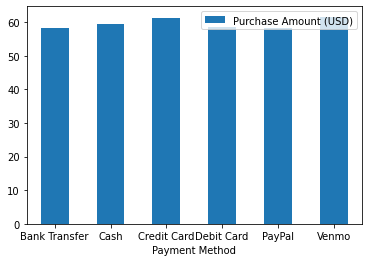

In [88]:
#Question 10 
#On average which payment methods do people spend the most money with?
#First isolate the columns in the data that we want to work with
q10_data = data[['Purchase Amount (USD)', 'Payment Method']]
#Make sure to remove any rows with NaN values
q10_data = q10_data.dropna(axis=0)

#Create a bar graph grouping the payment methods and calculating mean for each one.
payment_means = q10_data.groupby(['Payment Method']).mean()
payment_means.plot.bar(rot=0)
plt.show()

# Question 11
What is the distribution of age when a promo code is?

# Q11 Analysis
The distribution seems constant across majority of the 10 bins, however the last bin displays a somewhat higher frequency than then remaining bins. The last bin covers the age range 65-70 (historgram created with 10 bins).

In [89]:
# Filter for Promo Code = Yes
data_promo = data.loc[data['Promo Code Used'] == 'Yes']

# Extract the Age feature
data_promo_age = np.array(data_promo['Age'])

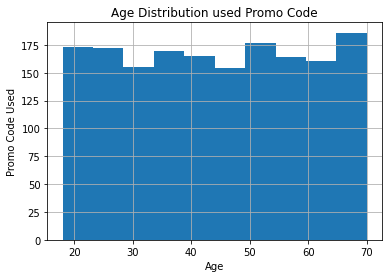

In [90]:
# Histogram with 10 bins
plt.hist(data_promo_age, bins=10)
plt.xlabel('Age')
plt.ylabel('Promo Code Used')
plt.title('Age Distribution used Promo Code')
plt.grid()
plt.show()